<a href="https://colab.research.google.com/github/mohammadanas7777/Probability-and-Statistical-Projects/blob/main/Assignment_on_Applied_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

<ipython-input-2-6562b8407dca>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Colab Notebooks/Superstore Marketing Data - Sheet1.csv'
superstore_marketing_df = pd.read_csv(filepath)
superstore_df = superstore_marketing_df.copy()

Mounted at /content/drive


In [ ]:
superstore_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
superstore_df.shape

(2240, 22)

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Dataset Duplicate Value Count
no_of_duplicate_values = len(superstore_df[superstore_df.duplicated()])
print("No. of duplicate values in the dataset is", no_of_duplicate_values)

No. of duplicate values in the dataset is 0


In [ ]:
# Missing Values/Null Values Count
print(superstore_df.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


<Axes: >

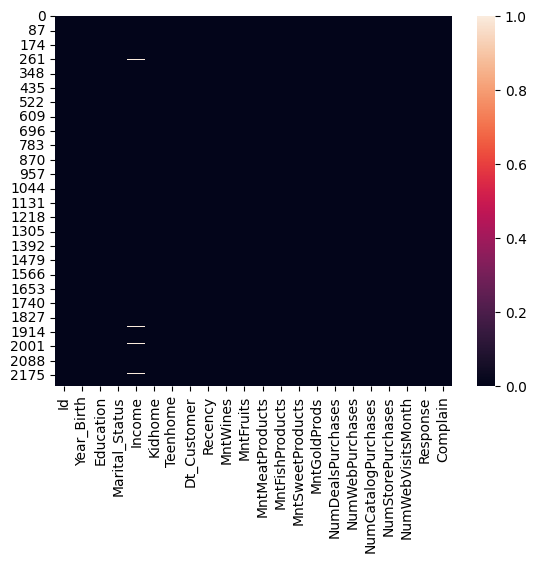

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(superstore_df.isnull())

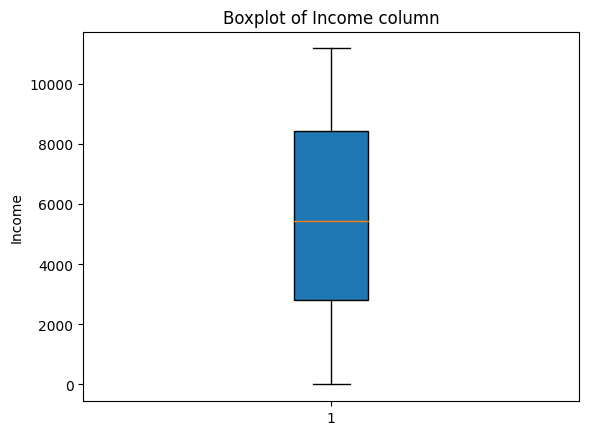

In [ ]:
data = np.array(superstore_df['Id'],superstore_df['Income'])
plt.title('Boxplot of Income column')
plt.ylabel('Income')
plt.boxplot(data,vert=True, patch_artist=True)
plt.show()

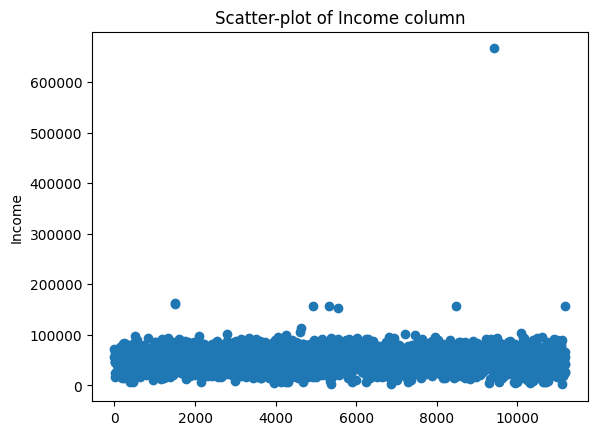

In [ ]:
plt.title('Scatter-plot of Income column')
plt.ylabel('Income')
plt.scatter(superstore_df['Id'],superstore_df['Income'])
plt.show()

In [ ]:
s_df = superstore_df.sort_values(by=['Income'], ascending=False).head(20)
s_df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
527,9432,1977,Graduation,Together,666666.0,1,0,########,23,9,...,8,1,12,4,3,1,3,6,0,0
731,1503,1976,PhD,Together,162397.0,1,1,########,31,85,...,2,1,2,0,0,0,1,1,0,0
497,1501,1982,PhD,Married,160803.0,0,0,########,21,55,...,17,3,4,15,0,28,1,0,0,0
853,5336,1971,Master,Together,157733.0,1,0,########,37,39,...,2,0,8,0,1,0,1,1,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,########,98,20,...,1,2,1,15,0,22,0,0,0,0
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/2013,13,1,...,2,1,1,0,0,28,0,1,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/2013,85,2,...,1,1,1,0,0,0,0,0,0,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,########,81,1,...,1,1,1,0,0,0,0,0,0,0
210,4619,1945,PhD,Single,113734.0,0,0,5/28/2014,9,6,...,1,262,3,0,27,0,0,1,0,0
832,4611,1970,Graduation,Together,105471.0,0,0,1/21/2013,36,1009,...,202,21,207,0,9,8,13,3,1,0




*  From above plots we can see that in Income column one record contains a very high value as compared to other values, which will affect our analysis and therefore it's better to drop that record. And then fill the Null values in income column by taking mean of those remaining records (Mean Imputation).




In [ ]:
superstore_drop_df = superstore_df['Income'].copy()
superstore_drop_df = superstore_drop_df.drop(superstore_drop_df.index[527])

In [ ]:
superstore_df['Income'] = superstore_df['Income'].fillna(superstore_drop_df.mean())

In [ ]:
superstore_df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [ ]:
superstore_df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52244.279319,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.813463,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.


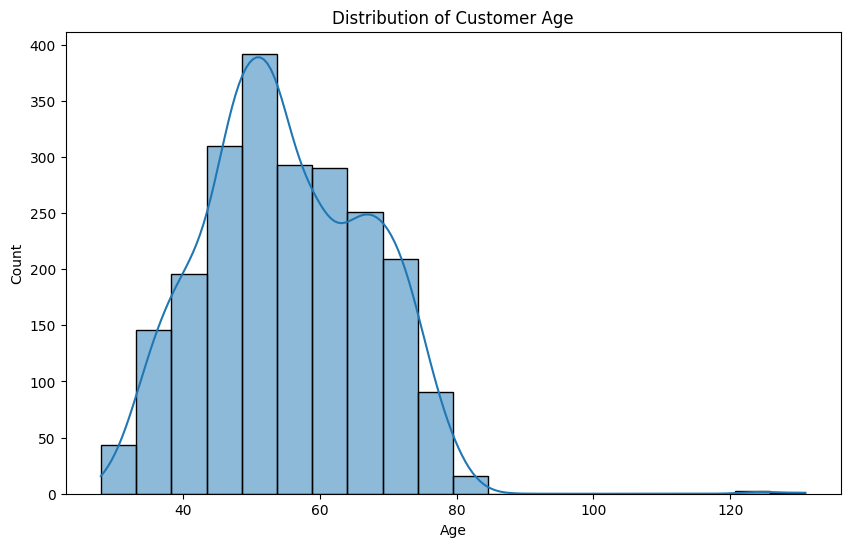

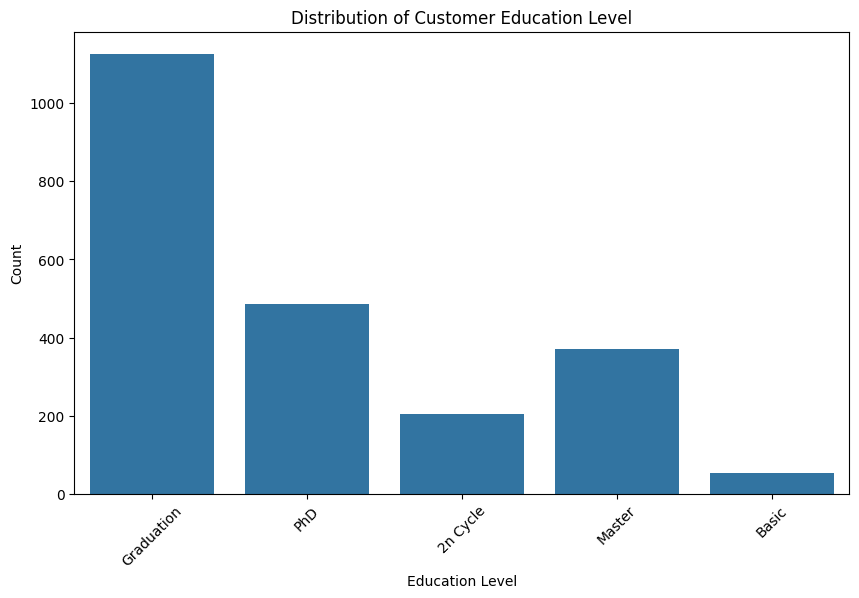

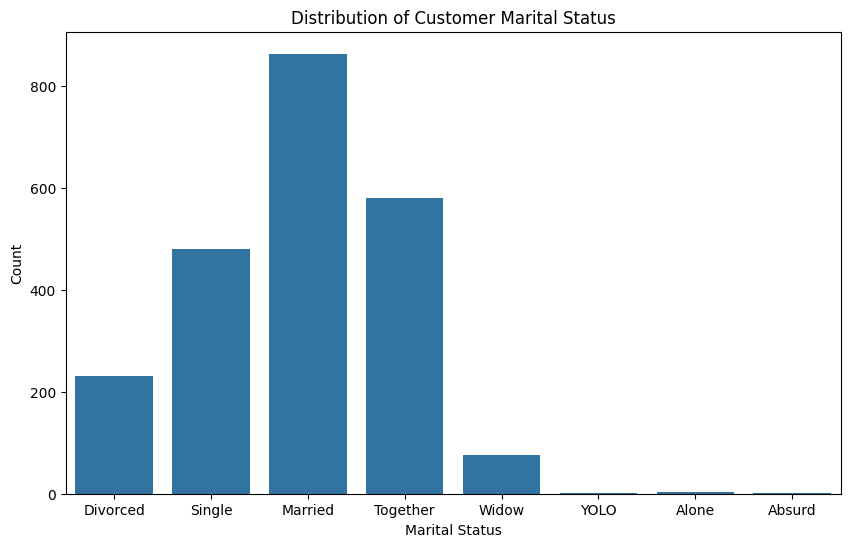

Summary Statistics for Age:
count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

Frequency Table for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Frequency Table for Marital Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [ ]:
# Age Distribution
# Calculate age from 'Year_Birth'
current_year = 2024
superstore_df['Age'] = current_year - superstore_df['Year_Birth']

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(superstore_df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Education Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=superstore_df)
plt.title('Distribution of Customer Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=superstore_df)
plt.title('Distribution of Customer Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Summary Statistics for Age
print("Summary Statistics for Age:")
print(superstore_df['Age'].describe())

# Summary Statistics for Education (Frequency Table)
print("\nFrequency Table for Education:")
print(superstore_df['Education'].value_counts())

# Summary Statistics for Marital Status (Frequency Table)
print("\nFrequency Table for Marital Status:")
print(superstore_df['Marital_Status'].value_counts())


**Summary Statistics table**

In [ ]:
# Calculate summary statistics for numerical variables
superstore_stats = superstore_df.describe()

# Extract mean, median, variance, and standard deviation
mean_values = superstore_stats.loc['mean']
median_values = superstore_stats.median()
variance_values = superstore_stats.var()
std_dev_values = superstore_stats.loc['std']

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

# Display the summary table
print("\nSummary Statistics for Numerical Variables:")
summary_table



Summary Statistics for Numerical Variables:


,Mean,Median,Variance,Standard Deviation
Id,5592.159821,4352.581099,1.298831e+07,3246.662198
Year_Birth,1968.805804,1969.402902,5.047456e+05,11.984069
Income,52244.279319,43640.125000,5.062504e+10,25037.813463
Kidhome,0.444196,0.491297,6.268819e+05,0.538398
Teenhome,0.506250,0.525394,6.268764e+05,0.544538
Recency,49.109375,49.054688,6.024709e+05,28.962453
MntWines,303.935714,320.266553,6.453947e+05,336.597393
MntFruits,26.302232,29.651116,6.070971e+05,39.773434
MntMeatProducts,166.950000,196.332686,7.716269e+05,225.715373
MntFishProducts,37.525446,43.762723,6.014046e+05,54.628979


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  


Descriptive Statistics for Income:
count      2240.000000
mean      52244.279319
std       25037.813463
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64
Number of outliers in Income: 8


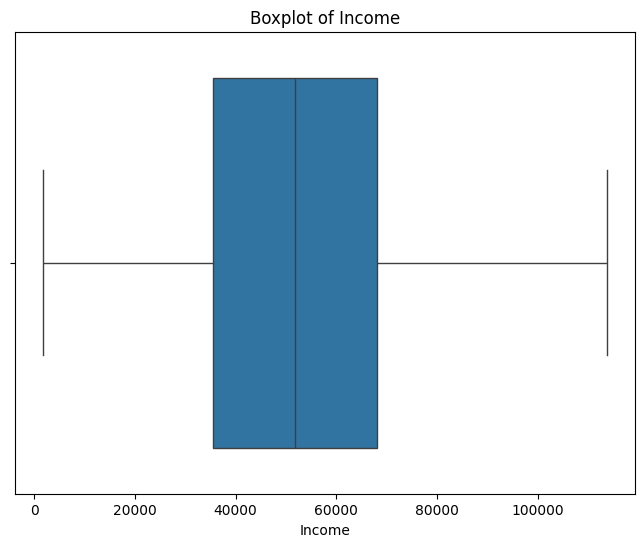


Descriptive Statistics for MntWines:
count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64
Number of outliers in MntWines: 35


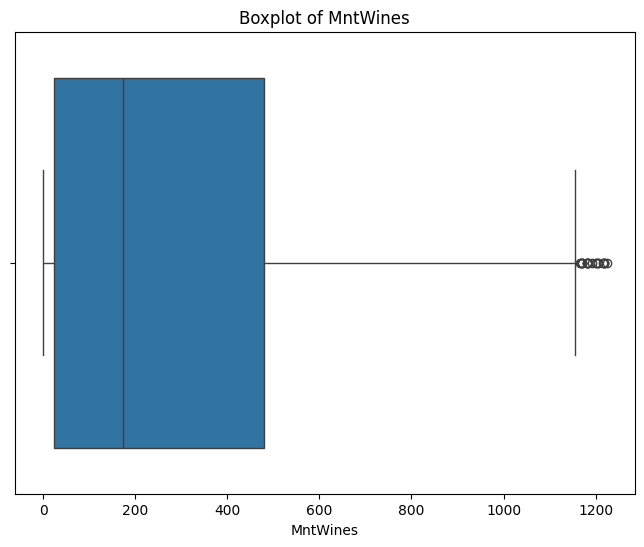


Descriptive Statistics for MntFruits:
count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64
Number of outliers in MntFruits: 227


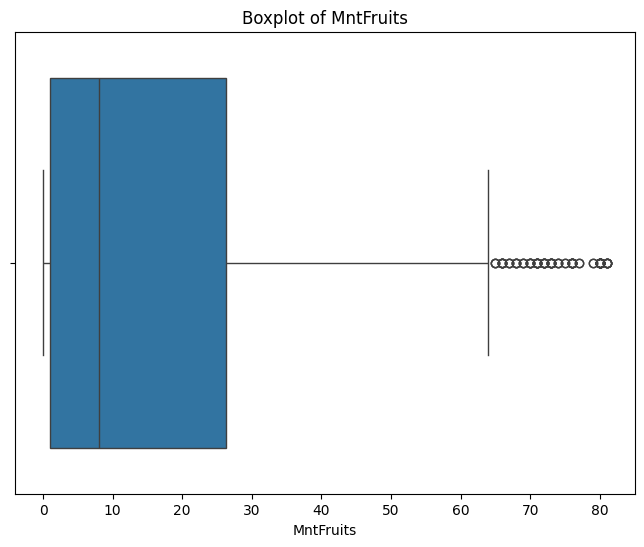


Descriptive Statistics for MntMeatProducts:
count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64
Number of outliers in MntMeatProducts: 175


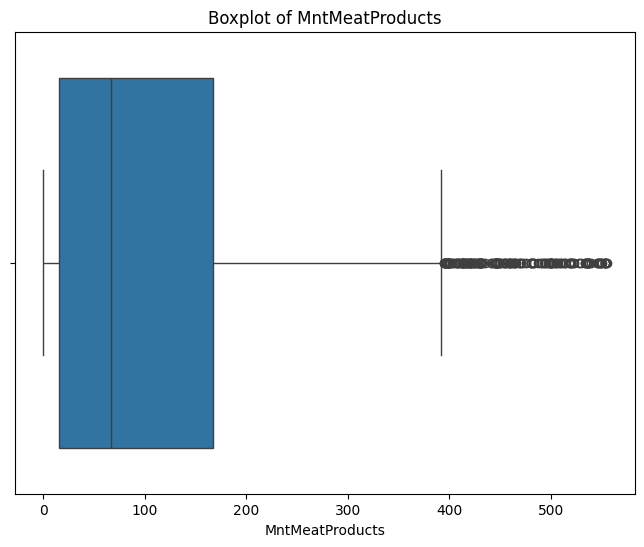


Descriptive Statistics for MntFishProducts:
count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64
Number of outliers in MntFishProducts: 223


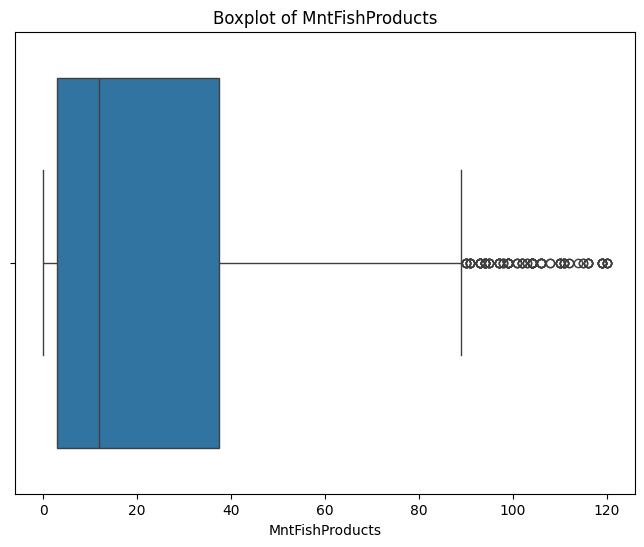


Descriptive Statistics for MntSweetProducts:
count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64
Number of outliers in MntSweetProducts: 248


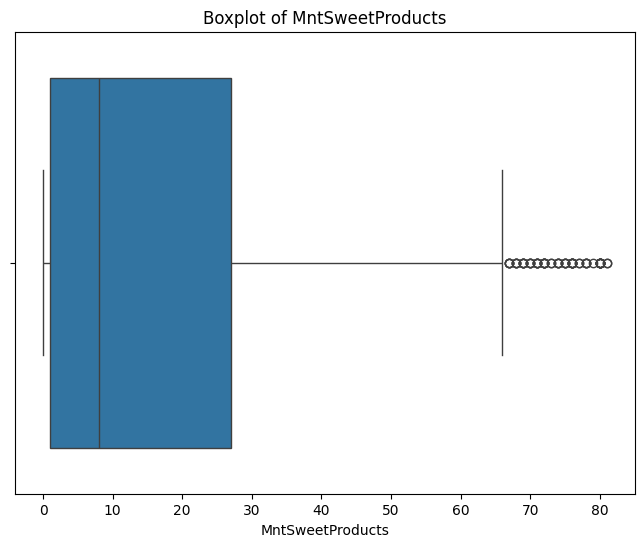


Descriptive Statistics for NumDealsPurchases:
count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64
Number of outliers in NumDealsPurchases: 86


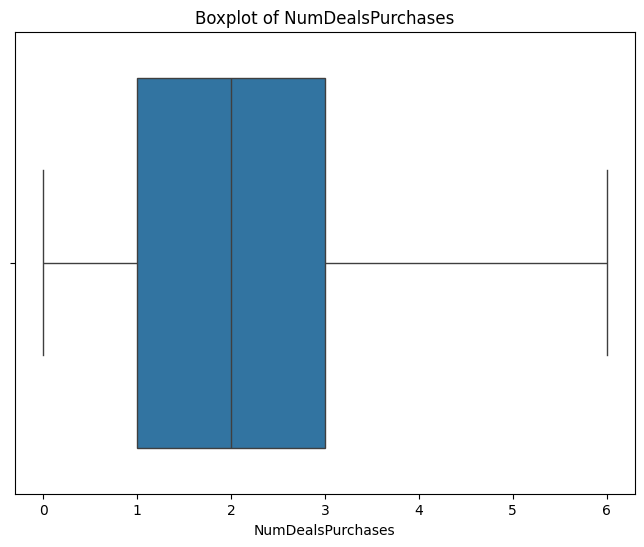


Descriptive Statistics for NumWebPurchases:
count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64
Number of outliers in NumWebPurchases: 4


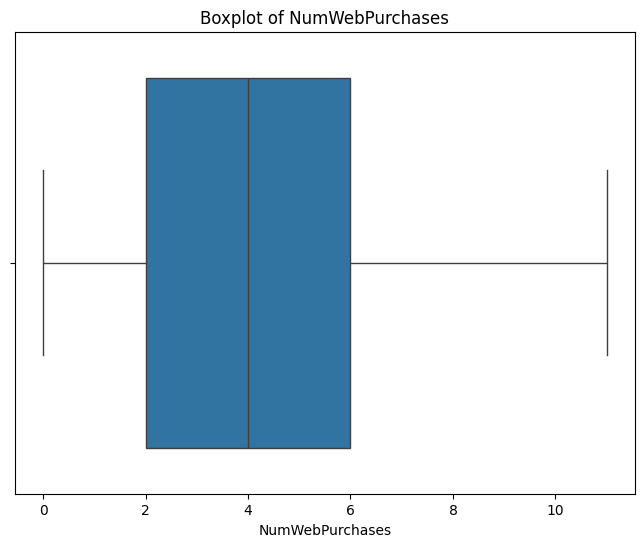

In [ ]:
# Calculate measures of central tendency and dispersion for key variables
key_variables = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases']

for variable in key_variables:
  print(f"\nDescriptive Statistics for {variable}:")
  print(superstore_df[variable].describe())

  # Identify outliers using IQR method
  Q1 = superstore_df[variable].quantile(0.25)
  Q3 = superstore_df[variable].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = superstore_df[(superstore_df[variable] < lower_bound) | (superstore_df[variable] > upper_bound)]

  print(f"Number of outliers in {variable}: {outliers.shape[0]}")

  # Handle outliers (Mean Imputation)
  superstore_df[variable] = np.where((superstore_df[variable] < lower_bound) | (superstore_df[variable] > upper_bound),
                                    superstore_df[variable].mean(), superstore_df[variable])

  # Visualize distribution with boxplot
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=superstore_df[variable])
  plt.title(f'Boxplot of {variable}')
  plt.show()


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
superstore_df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189.0,...,27.062946,218,1.0,4.0,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464.0,...,0.000000,37,1.0,7.0,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134.0,...,2.000000,30,1.0,3.0,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10.0,...,0.000000,0,1.0,1.0,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6.0,...,0.000000,34,2.0,3.0,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372.0,...,48.000000,78,2.0,5.0,2,11,4,0,0,48
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5.0,...,8.000000,16,1.0,1.0,0,3,8,0,0,47
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185.0,...,5.000000,14,2.0,6.0,1,5,8,0,0,48
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267.0,...,27.062946,63,1.0,5.0,4,10,3,0,0,46


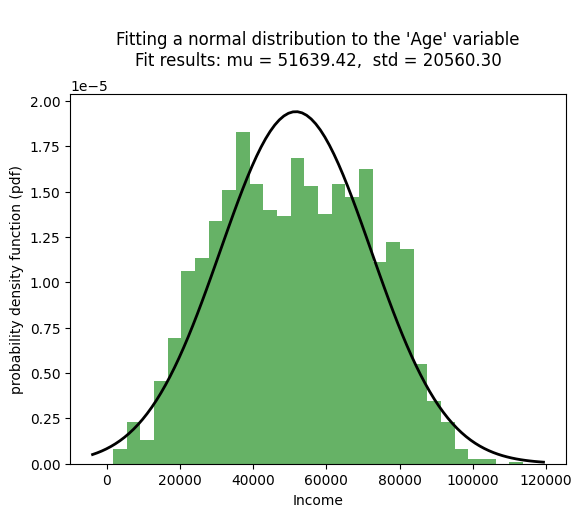

In [ ]:
# Fit a normal distribution to the 'Income' variable
from scipy.stats import norm
from scipy.integrate import quad

mu, std = norm.fit(superstore_df['Income'])

# Plot the histogram of 'Income'
plt.hist(superstore_df['Income'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# pdf = lambda x: norm.pdf(x, mu, std)
# # Integrate the PDF over the entire range of possible values
# total_probability, _ = quad(pdf, -np.inf, np.inf)
# print("Total probability:", total_probability)

plt.plot(x, p, 'k', linewidth=2)
title = '''
Fitting a normal distribution to the 'Age' variable
Fit results: mu = %.2f,  std = %.2f
''' % (mu, std)
plt.title(title)
plt.ylabel('probability density function (pdf)')
plt.xlabel('Income')

plt.show()

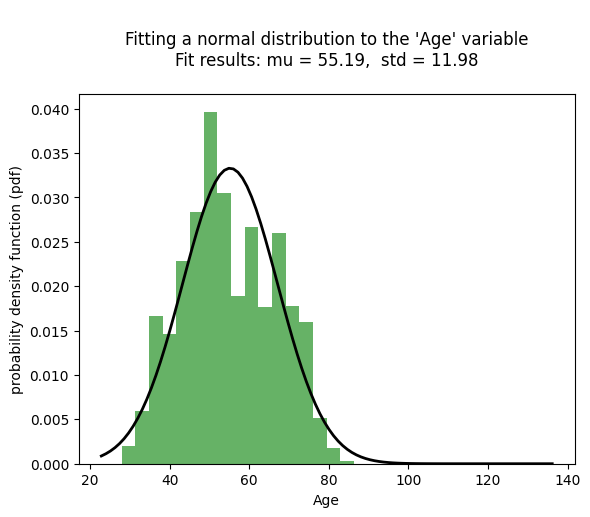

In [ ]:
# Fit a normal distribution to the 'Age' variable
from scipy.stats import norm
from scipy.integrate import quad

mu, std = norm.fit(superstore_df['Age'])

# Plot the histogram of 'Age'
plt.hist(superstore_df['Age'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# pdf = lambda x: norm.pdf(x, mu, std)
# # Integrate the PDF over the entire range of possible values
# total_probability, _ = quad(pdf, -np.inf, np.inf)
# print("Total probability:", total_probability)

plt.plot(x, p, 'k', linewidth=2)
title = '''
Fitting a normal distribution to the 'Age' variable
Fit results: mu = %.2f,  std = %.2f
''' % (mu, std)
plt.title(title)
plt.ylabel('probability density function (pdf)')
plt.xlabel('Age')

plt.show()

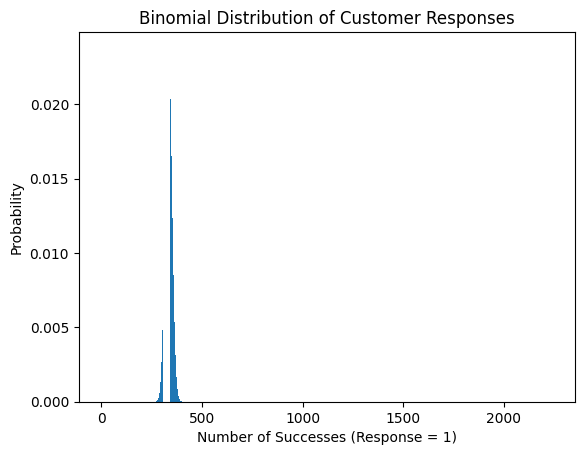

Expected Value: 334.0
Variance: 284.1982142857143


In [ ]:
from scipy.stats import binom

# Count the number of successes (Response = 1) and failures (Response = 0)
num_successes = superstore_df['Response'].sum()
num_trials = len(superstore_df['Response'])

# Estimate the probability of success (p)
p = num_successes / num_trials

# Create a binomial distribution object
binom_dist = binom(n=num_trials, p=p)

# Plot the probability mass function (PMF)
x = np.arange(0, num_trials + 1)
pmf = binom_dist.pmf(x)

plt.bar(x, pmf)
plt.xlabel('Number of Successes (Response = 1)')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Customer Responses')
plt.show()

# Calculate expected value and variance
expected_value = binom_dist.mean()
variance = binom_dist.var()

print("Expected Value:", expected_value)
print("Variance:", variance)


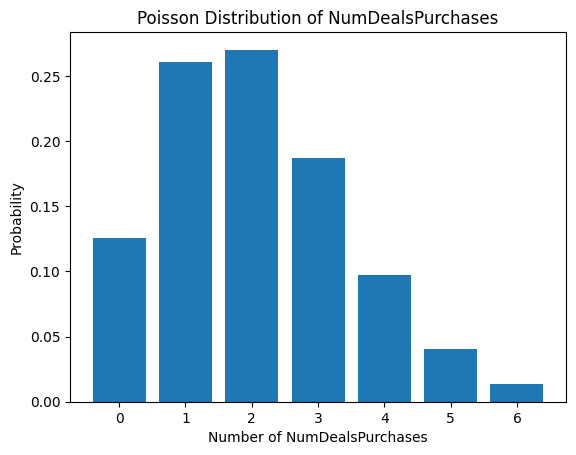

Expected NumDealsPurchases: 2.07453125
Variance of NumDealsPurchases: 2.07453125




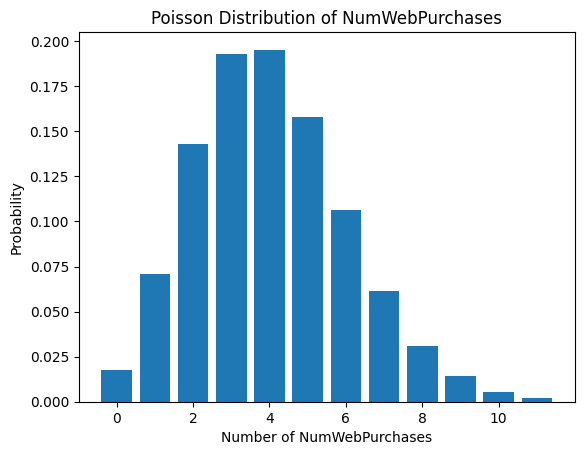

Expected NumWebPurchases: 4.046580038265306
Variance of NumWebPurchases: 4.046580038265306




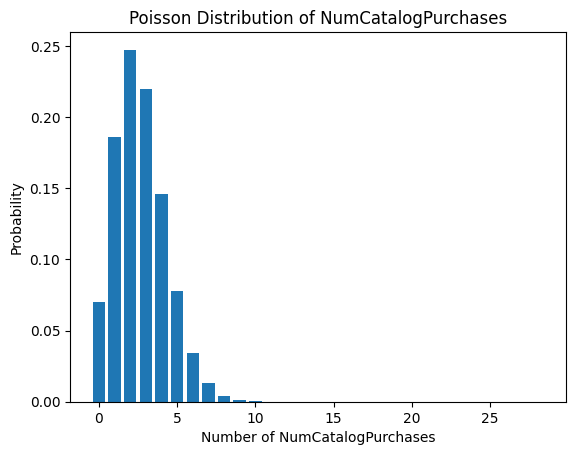

Expected NumCatalogPurchases: 2.6620535714285714
Variance of NumCatalogPurchases: 2.6620535714285714




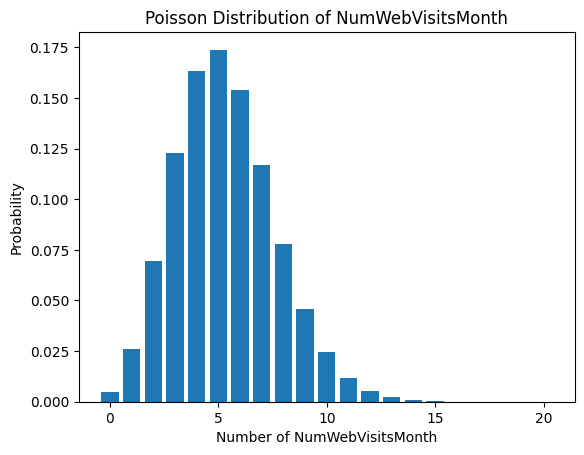

Expected NumWebVisitsMonth: 5.316517857142857
Variance of NumWebVisitsMonth: 5.316517857142857




In [ ]:
from scipy.stats import poisson

# Assuming 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth' are Poisson distributed
# Reason: Represents the count of discrete events (purchases or visits) in a fixed period.
# Assuming these events are independent and occur at a constant rate.

for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']:
    # Fit Poisson distribution
    mu = superstore_df[col].mean()
    poisson_dist = poisson(mu=mu)

    # Calculate probabilities
    k = np.arange(0, superstore_df[col].max() + 1)
    probs = poisson_dist.pmf(k)

    # Plot PMF
    plt.bar(k, probs)
    plt.xlabel(f'Number of {col}')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution of {col}')
    plt.show()

    # Expected value and variance
    expected_value = poisson_dist.mean()
    variance = poisson_dist.var()
    print(f"Expected {col}:", expected_value)
    print(f"Variance of {col}:", variance)
    print('\n')


As, Gamma distribution is often suitable for modeling continuous, non-negative
variables that represent amounts or magnitudes. In this case, the variables
'MntWines', 'MntFruits', etc., represent the amount of money spent on different
product categories. These amounts are naturally non-negative and could exhibit
skewness (some customers might spend significantly more than others).

The Gamma distribution's flexibility in capturing various shapes of skewed
distributions makes it a reasonable choice for modeling these variables.

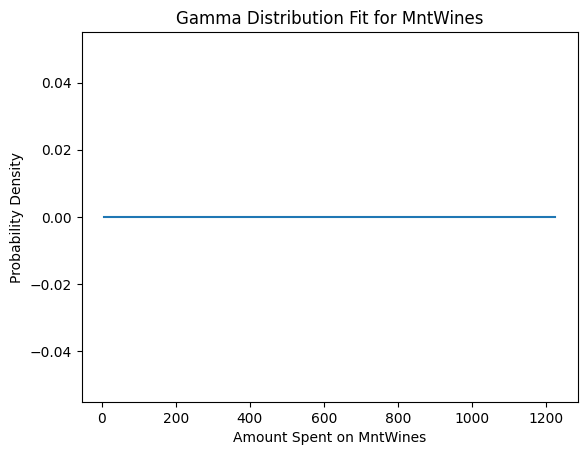

Probability of spending less than 100 on MntWines: 1.0000
Expected amount spent on MntWines: 0.00
Variance of amount spent on MntWines: 0.00




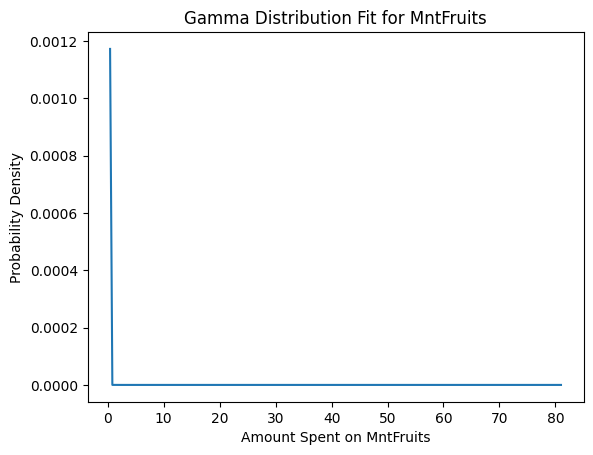

Probability of spending less than 100 on MntFruits: 1.0000
Expected amount spent on MntFruits: 0.03
Variance of amount spent on MntFruits: 0.00




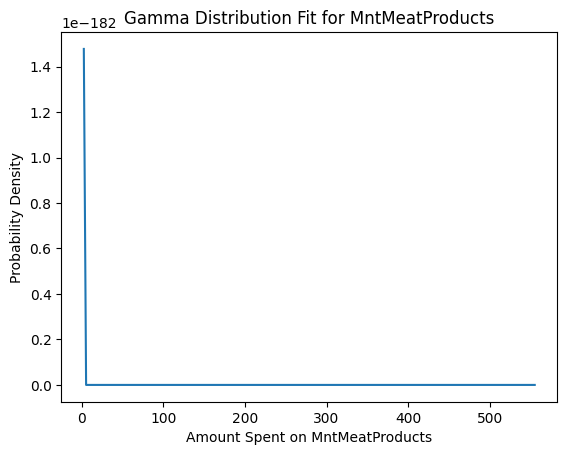

Probability of spending less than 100 on MntMeatProducts: 1.0000
Expected amount spent on MntMeatProducts: 0.01
Variance of amount spent on MntMeatProducts: 0.00




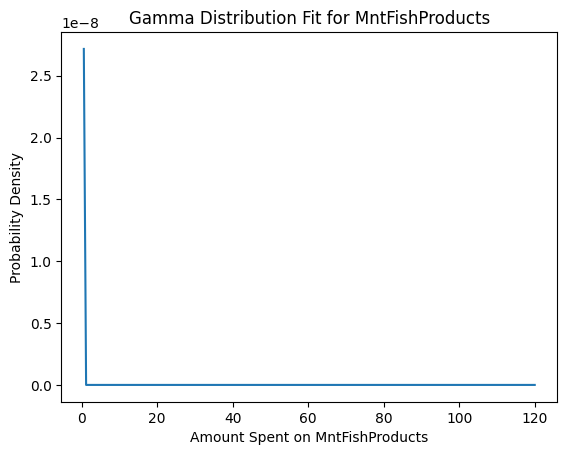

Probability of spending less than 100 on MntFishProducts: 1.0000
Expected amount spent on MntFishProducts: 0.02
Variance of amount spent on MntFishProducts: 0.00




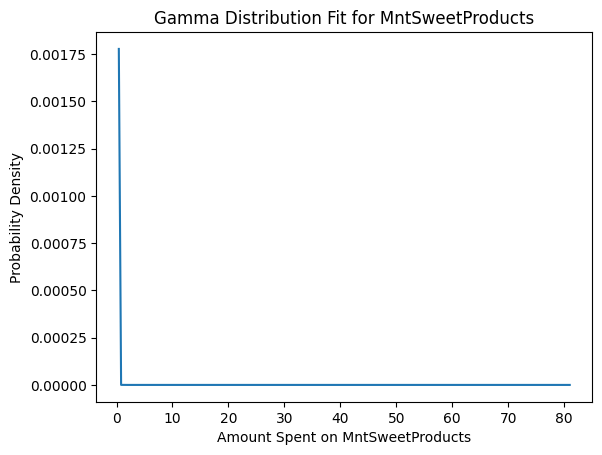

Probability of spending less than 100 on MntSweetProducts: 1.0000
Expected amount spent on MntSweetProducts: 0.04
Variance of amount spent on MntSweetProducts: 0.00




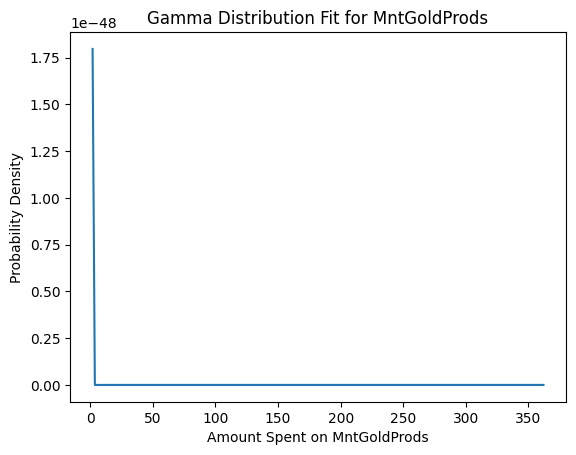

Probability of spending less than 100 on MntGoldProds: 1.0000
Expected amount spent on MntGoldProds: 0.01
Variance of amount spent on MntGoldProds: 0.00




In [ ]:
import scipy.stats as stats

# Variables representing amounts spent
amount_spent_vars = ['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Iterate through each variable
for var in amount_spent_vars:
    # Fit Gamma distribution (using Method of Moments)
    alpha = superstore_df[var].mean() ** 2 / superstore_df[var].var()
    beta = superstore_df[var].var() / superstore_df[var].mean()
    gamma_dist = stats.gamma(a=alpha, scale=1/beta)

    # Plot PDF
    x = np.linspace(0, superstore_df[var].max(), 200)
    plt.plot(x, gamma_dist.pdf(x))
    plt.xlabel(f'Amount Spent on {var}')
    plt.ylabel('Probability Density')
    plt.title(f'Gamma Distribution Fit for {var}')
    plt.show()

    # Calculate probabilities (example: probability of spending less than 100)
    prob_less_than_100 = gamma_dist.cdf(100)
    print(f"Probability of spending less than 100 on {var}: {prob_less_than_100:.4f}")

    # Expected value and variance
    expected_value = gamma_dist.mean()
    variance = gamma_dist.var()
    print(f"Expected amount spent on {var}: {expected_value:.2f}")
    print(f"Variance of amount spent on {var}: {variance:.2f}")
    print('\n')


Since, Gammma distribution is not showing a correct behaviour. Let's plot histogram plots for these columns.

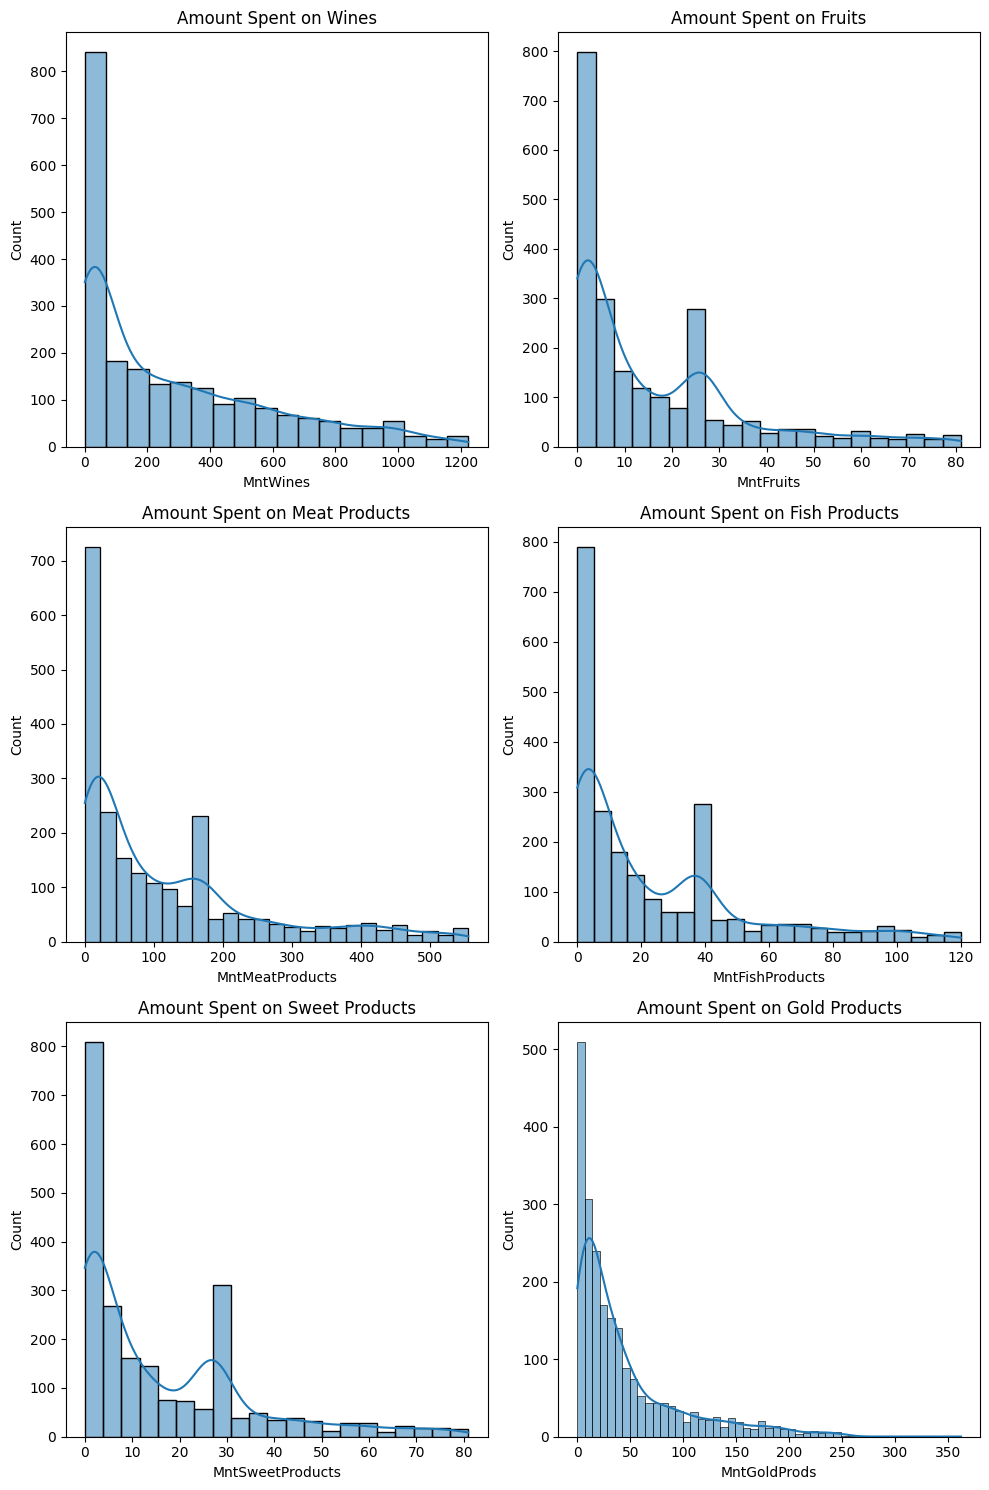

In [ ]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Plot histograms
sns.histplot(superstore_df['MntWines'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Amount Spent on Wines')

sns.histplot(superstore_df['MntFruits'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Amount Spent on Fruits')

sns.histplot(superstore_df['MntMeatProducts'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Amount Spent on Meat Products')

sns.histplot(superstore_df['MntFishProducts'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Amount Spent on Fish Products')

sns.histplot(superstore_df['MntSweetProducts'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Amount Spent on Sweet Products')

sns.histplot(superstore_df['MntGoldProds'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Amount Spent on Gold Products')

# Adjust layout
plt.tight_layout()
plt.show()


Now as we can see that the plots are following skewness towards left side. So, it's better we should use skewed plots e.g. log-normal distribution.

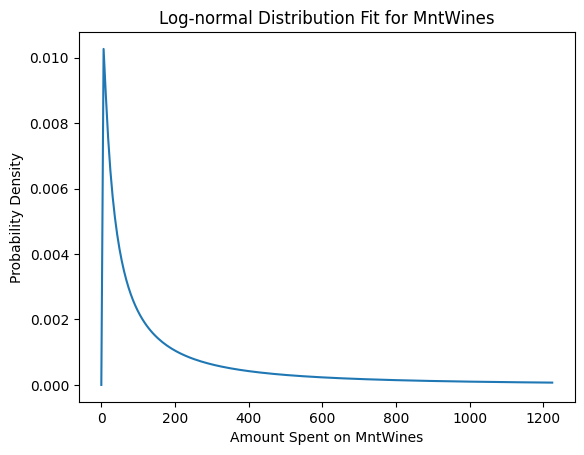

Probability of spending less than 100 on MntWines: 0.4899
Expected amount spent on MntWines: 510.51
Variance of amount spent on MntWines: 5945442.65




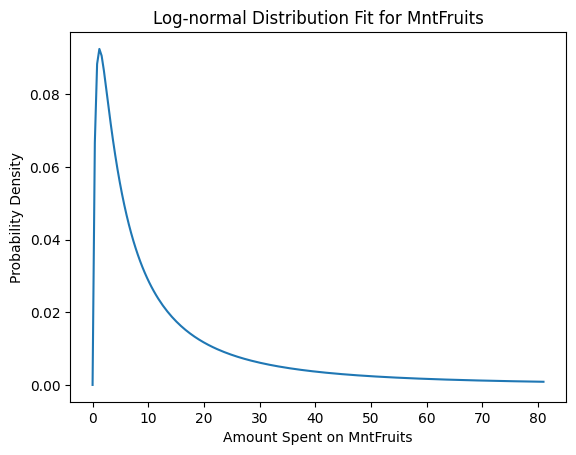

Probability of spending less than 100 on MntFruits: 0.9671
Expected amount spent on MntFruits: 20.57
Variance of amount spent on MntFruits: 2341.00




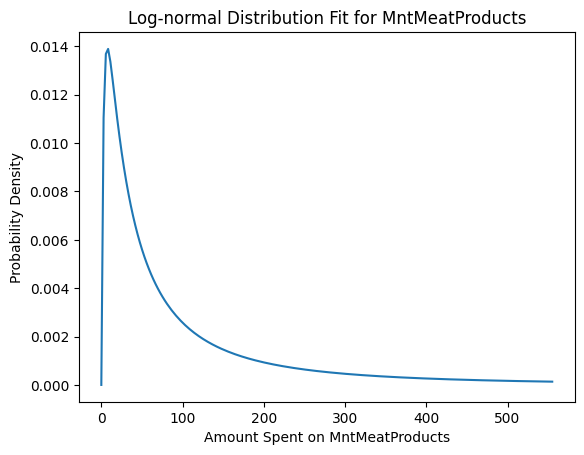

Probability of spending less than 100 on MntMeatProducts: 0.6624
Expected amount spent on MntMeatProducts: 151.02
Variance of amount spent on MntMeatProducts: 148105.10




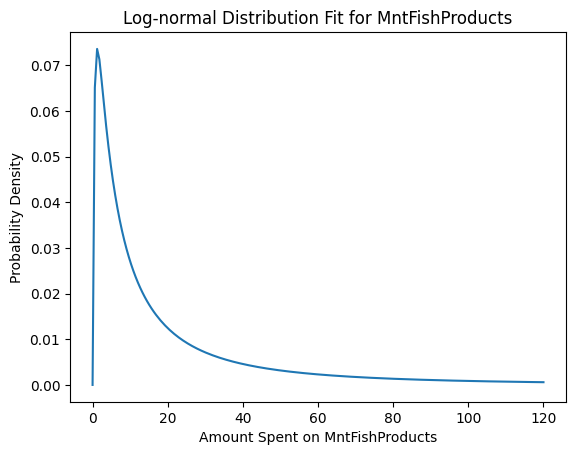

Probability of spending less than 100 on MntFishProducts: 0.9343
Expected amount spent on MntFishProducts: 32.05
Variance of amount spent on MntFishProducts: 7909.56




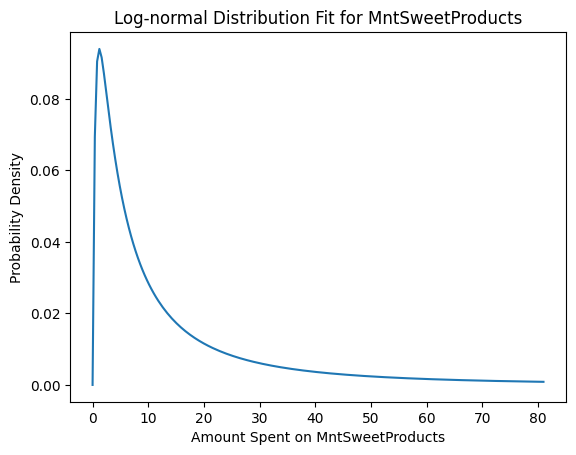

Probability of spending less than 100 on MntSweetProducts: 0.9668
Expected amount spent on MntSweetProducts: 20.60
Variance of amount spent on MntSweetProducts: 2416.32




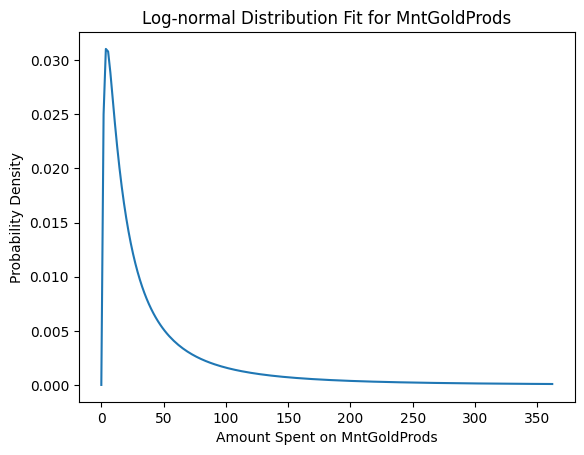

Probability of spending less than 100 on MntGoldProds: 0.8754
Expected amount spent on MntGoldProds: 51.96
Variance of amount spent on MntGoldProds: 11483.16




In [ ]:
import scipy.stats as stats

# Variables representing amounts spent
amount_spent_vars = ['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Iterate through each variable
for var in amount_spent_vars:
    # Fit Log-normal distribution
    # Note: Taking log of data to fit normal distribution and then transforming back
    log_data = np.log(superstore_df[var] + 1)  # Adding 1 to handle potential zeros
    mu, std = norm.fit(log_data)
    lognorm_dist = stats.lognorm(s=std, scale=np.exp(mu))

    # Plot PDF
    x = np.linspace(0, superstore_df[var].max(), 200)
    plt.plot(x, lognorm_dist.pdf(x))
    plt.xlabel(f'Amount Spent on {var}')
    plt.ylabel('Probability Density')
    plt.title(f'Log-normal Distribution Fit for {var}')
    plt.show()

    # Calculate probabilities (example: probability of spending less than 100)
    prob_less_than_100 = lognorm_dist.cdf(100)
    print(f"Probability of spending less than 100 on {var}: {prob_less_than_100:.4f}")

    # Expected value and variance
    expected_value = lognorm_dist.mean()
    variance = lognorm_dist.var()
    print(f"Expected amount spent on {var}: {expected_value:.2f}")
    print(f"Variance of amount spent on {var}: {variance:.2f}")
    print('\n')


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

In [ ]:
superstore_Edu_Mar_df = superstore_df[['Education','Marital_Status','MntWines','MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()
superstore_Edu_Mar_df_mean = superstore_Edu_Mar_df.groupby(['Marital_Status','Education']).mean()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
superstore_Edu_Mar_df_mean

MntWines  MntFruits  MntMeatProducts  \
Marital_Status Education                                            
Absurd         Graduation  471.000000  26.302232       125.000000   
               Master      240.000000  67.000000       500.000000   
Alone          Graduation    5.000000   7.000000        24.000000   
               Master      534.000000   5.000000        47.000000   
               PhD          15.000000   0.000000         8.000000   
Divorced       2n Cycle    351.173913  21.404445       122.389130   
               Basic         0.000000   1.000000         3.000000   
               Graduation  292.243157  17.513764       140.720588   
               Master      301.405405  16.548709       104.537838   
               PhD         369.441071  14.432907       102.170192   
Married        2n Cycle    154.777778  18.384144       100.479630   
               Basic        15.200000  10.665112        17.000000   
               Graduation  262.671462  17.579934       125.767552   
               Master      319.151708  11.886410       101.171014   
               PhD         381.205320  15.714746       124.604948   
Single         2n Cycle    209.945946  19.635437        92.316216   
               Basic         3.111111   9.166667         7.611111   
               Graduation  255.253458  17.396351       135.813294   
               Master      357.438286  16.732089       114.962667   
               PhD         331.793950  11.007348       116.792347   
Together       2n Cycle    188.421053  16.475713       101.085965   
               Basic         2.000000   8.714286         8.142857   
               Graduation  297.383716  16.937701       131.030245   
               Master      294.159771  15.598282       117.299057   
               PhD         348.749389  12.508642       130.183761   
Widow          2n Cycle    221.800000  32.460446        94.790000   
               Basic         3.000000   3.000000        24.000000   
               Graduation  298.657143  20.197334       133.908571   
               Master      350.911310  20.800372       155.491667   
               PhD         437.747321  15.329446       149.581250   
YOLO           PhD         322.000000   3.000000        50.000000   

                           MntFishProducts  MntSweetProducts  MntGoldProds  
Marital_Status Education                                                    
Absurd         Graduation        37.525446         61.000000    245.000000  
               Master            37.525446          0.000000    163.000000  
Alone          Graduation        19.000000         14.000000     20.000000  
               Master             0.000000          5.000000     41.000000  
               PhD                4.000000          2.000000     20.000000  
Divorced       2n Cycle          27.022845         14.320769     50.000000  
               Basic             10.000000          6.000000      9.000000  
               Graduation        20.490816         16.657109     49.067227  
               Master            16.177739         15.244944     46.891892  
               PhD               25.194265         12.674287     38.576923  
Married        2n Cycle          25.861480         13.528621     47.666667  
               Basic             14.652545         15.403147     26.750000  
               Graduation        25.577996         17.539609     49.972286  
               Master            18.584624         12.070691     37.094203  
               PhD               20.735700         15.159528     30.447917  
Single         2n Cycle          24.056805         17.873371     48.891892  
               Basic              9.777778          8.500000     19.555556  
               Graduation        26.090735         18.098514     51.138889  
               Master            25.009720         13.912542     41.173333  
               PhD               19.541855         14.945199     29.122449  
Together       2n Cycle          27.707112         17.660

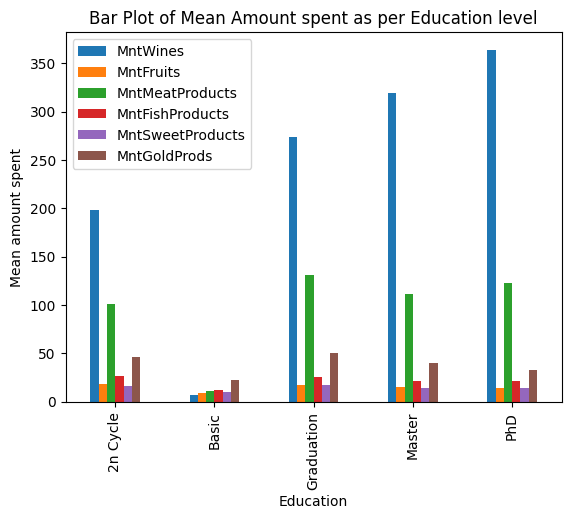

In [ ]:
superstore_Edu_df = superstore_df[['Education','MntWines','MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()
superstore_Edu_df_mean = superstore_Edu_df.groupby(['Education']).mean()

# Bar plot
superstore_Edu_df_mean.plot(kind='bar')
plt.title('Bar Plot of Mean Amount spent as per Education level')
plt.xlabel('Education')
plt.ylabel('Mean amount spent')
plt.show()

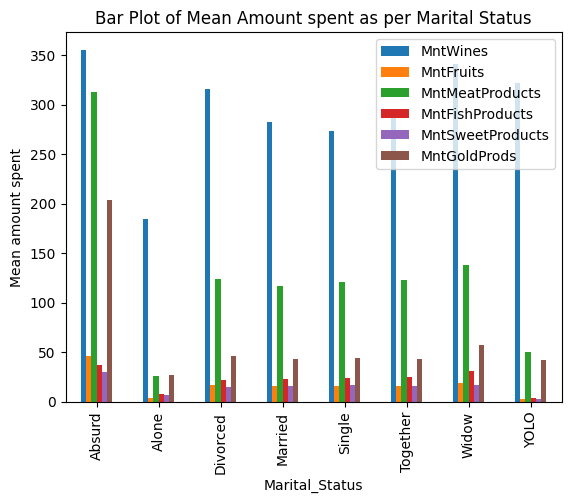

In [ ]:
superstore_Mar_df = superstore_df[['Marital_Status','MntWines','MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()
superstore_Mar_df_mean = superstore_Mar_df.groupby(['Marital_Status']).mean()

# Bar plot
superstore_Mar_df_mean.plot(kind='bar')
plt.title('Bar Plot of Mean Amount spent as per Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Mean amount spent')
plt.show()

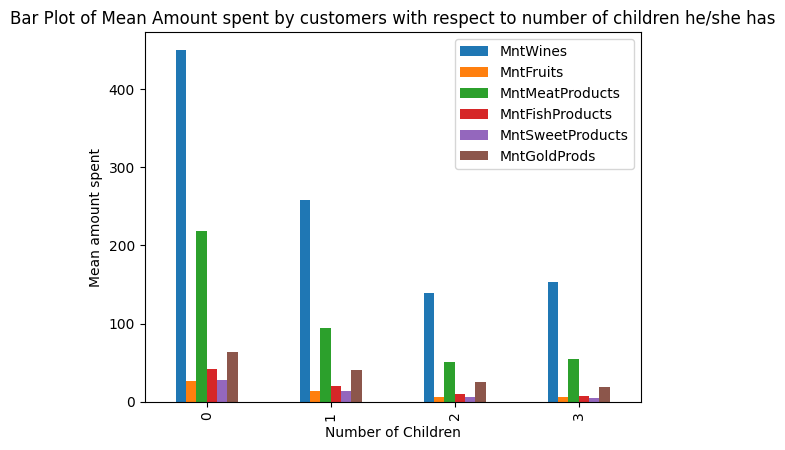

In [ ]:
# Create 'Child_home' column
superstore_df['Child_home'] = superstore_df['Kidhome'] + superstore_df['Teenhome']
superstore_Child_df = superstore_df[['Child_home','MntWines','MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()
superstore_Child_df_mean = superstore_Child_df.groupby(['Child_home']).mean()

# Bar plot
superstore_Child_df_mean.plot(kind='bar')
plt.title('Bar Plot of Mean Amount spent by customers with respect to number of children he/she has')
plt.xlabel('Number of Children')
plt.ylabel('Mean amount spent')
plt.show()

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

**Key insights from the plots:**

Education vs Spending:
- Customers with a PhD tend to spend the most on average across most categories, especially wines.
- Customers with a basic education level generally spend the least.
- This suggests that higher education levels might correlate with higher spending power and a preference for certain product categories like wines.

Marital Status vs Spending:
- Single customers appear to have the highest average spending across most categories.
- Married and divorced customers exhibit relatively similar spending patterns.
- This could indicate that single individuals might have more disposable income or different consumption habits compared to married or divorced individuals.

Number of Children vs Spending:
- Customers with no children at home tend to spend the most on average.
- As the number of children increases, the average spending generally decreases.
- This aligns with the expectation that families with children might have less disposable income due to increased expenses related to raising children.

Overall, these insights suggest potential customer segments based on:
- High-spending, highly educated individuals (e.g., PhD holders) who might be targeted with premium products and offers.
- Single individuals with potentially higher disposable income who could be receptive to promotions and targeted marketing campaigns.
- Families with children who might be more price-sensitive and interested in value-oriented products and deals.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

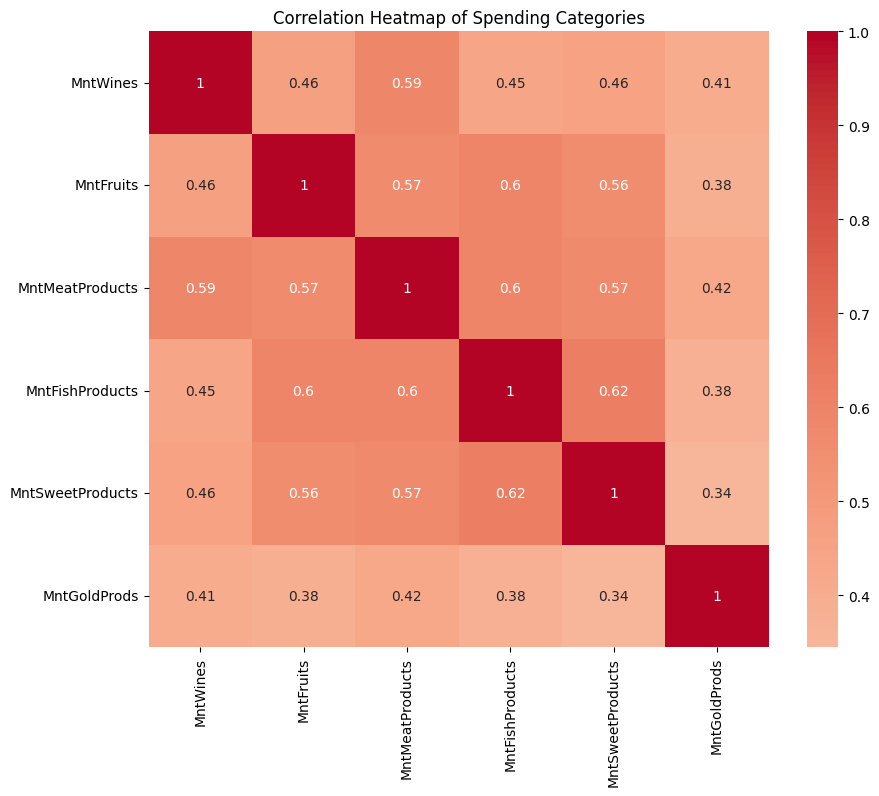

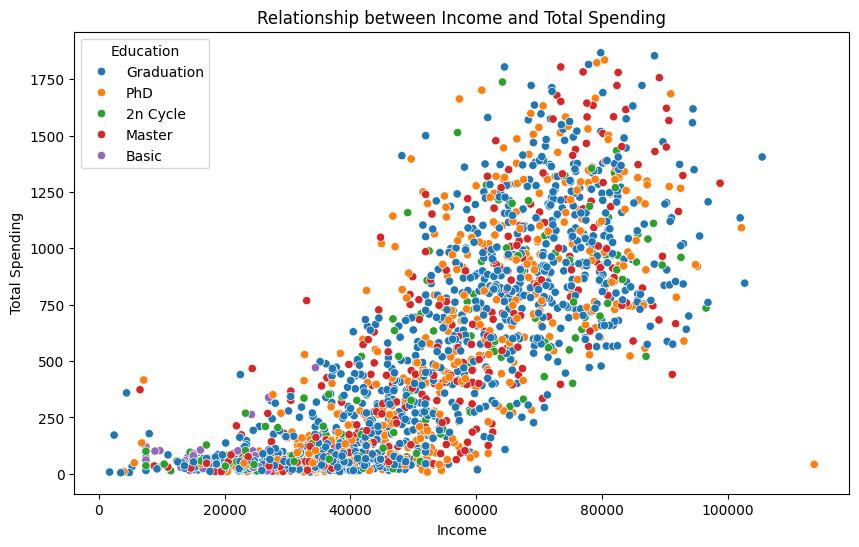

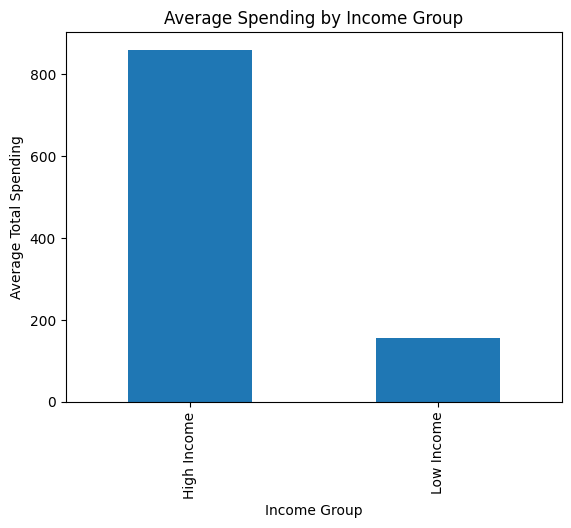

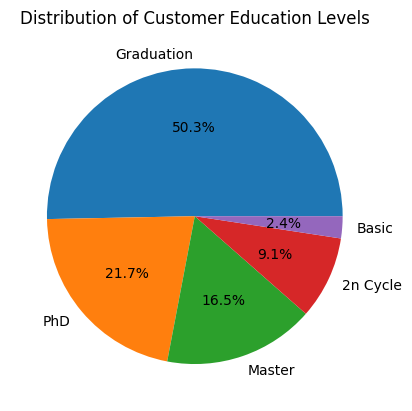

In [ ]:
# Create a heatmap to visualize correlations between spending on different categories
correlation_matrix = superstore_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Spending Categories')
plt.show()

# Create a scatter plot to explore the relationship between income and total spending
superstore_df['TotalSpending'] = superstore_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=superstore_df, hue='Education')
plt.title('Relationship between Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

# Create a bar chart to compare average spending by customer segments
# (Example: High-income vs. Low-income)
high_income_threshold = superstore_df['Income'].median()
superstore_df['IncomeGroup'] = np.where(superstore_df['Income'] > high_income_threshold, 'High Income', 'Low Income')
avg_spending_by_income = superstore_df.groupby('IncomeGroup')['TotalSpending'].mean()
avg_spending_by_income.plot(kind='bar')
plt.title('Average Spending by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Total Spending')
plt.show()

# Create a pie chart to visualize the distribution of customer education levels
education_counts = superstore_df['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Education Levels')
plt.show()

**Recommendations:**

1. Target High-Spending, Highly Educated Customers:
- Develop premium product lines and exclusive offers tailored to the preferences of highly educated customers (e.g., premium wine selections, gourmet food baskets).
- Implement targeted marketing campaigns through channels frequented by this segment (e.g., professional networks, online platforms).

2. Engage Single Individuals with Personalized Promotions:
- Leverage data on individual preferences and purchase history to create personalized promotions and recommendations.
- Utilize social media and online advertising to reach this segment effectively.

3. Offer Value-Oriented Products and Deals for Families:
- Introduce bundled offers and discounts on family-friendly products (e.g., bulk purchases, discounts on children's products).
- Partner with family-oriented organizations or events to promote relevant products and services.

4. Enhance Customer Experience and Loyalty Programs:
- Invest in improving customer service and creating personalized shopping experiences to foster loyalty across all segments.
- Develop a tiered loyalty program that rewards customers based on their spending and engagement.

5. Leverage Data Analytics for Continuous Improvement:
- Continuously analyze customer data to identify emerging trends, preferences, and opportunities for optimization.
- Utilize A/B testing and other data-driven approaches to refine marketing strategies and product offerings.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍